Number of lines in CSV: (8036, 7)
Min Steering Angle:-0.9426954
Max Steering Angle:1.0


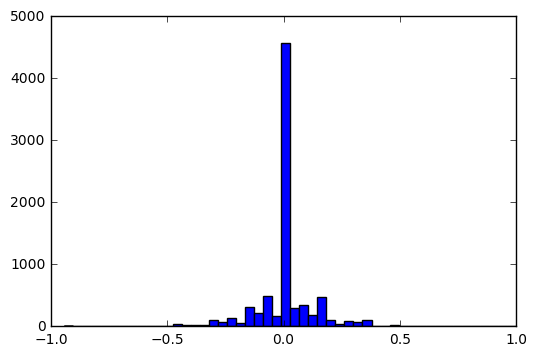

In [5]:
import numpy as np
from PIL import Image, ImageEnhance, ImageOps
import pandas as pd

path = '/data1/udacity/simulator/data'
img_path = path +'/IMG'
csv_file = path +'/driving_log.csv'

csv_array=pd.read_csv(csv_file)

print("Number of lines in CSV: " + str(csv_array.shape))

import matplotlib.pyplot as plt
%matplotlib inline


plt.hist(csv_array.steering, bins=50)
print("Min Steering Angle:" + str(min(csv_array.steering)))
print("Max Steering Angle:" + str(max(csv_array.steering)))

0
1
2
0
1
2
0
1
2


/home/alans/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


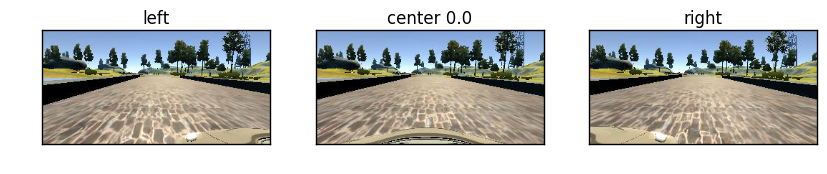

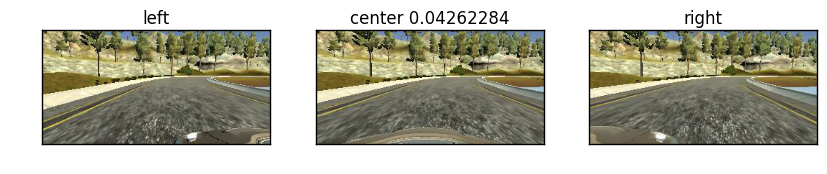

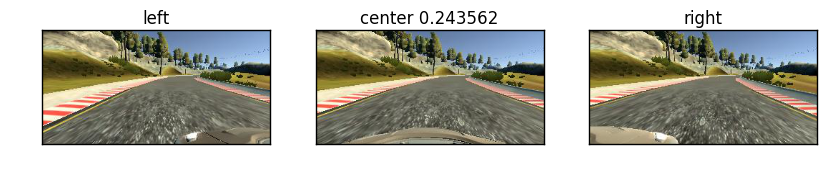

In [16]:
# center, left, right, steering angle, throttle, break, speed

# preprocess the data

X_full_name = []
y_full_angle= []

line = csv_array.iloc[0]
  #print(line)

    
def plotCameraImages(line):
  fig, axes = plt.subplots(1, 3)
  fig.set_figwidth(10)
  fig.set_figheight(20)

  i=0
  for camera in ['left','center','right']:
    print(i)
    axes.flat[i].imshow(Image.open(path+'/'+line[camera].decode('UTF-8').strip()))
    axes.flat[i].tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    if (camera=='center'):
       axes.flat[i].set_title(camera+' ' +str(line['steering']))
    else:
       axes.flat[i].set_title(camera)
        
    i=i+1
    
plotCameraImages(csv_array.iloc[0])
plotCameraImages(csv_array.iloc[1900])
plotCameraImages(csv_array[csv_array.steering < 0.26 ][csv_array.steering>0.24].iloc[4])
    


In [19]:

csv_data2.head()


,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236
